In [2]:
import numpy as np 
from matplotlib import pyplot as plt

# Задание 1
Реализуйте построения TCB-сплайна. Изучите влияние параметра 𝛾 на непрерывность сплайна.
Для чего изменяйте значение 𝛾 с шагом 1/10 от −1 до 1 и для каждого значения стройте отдельный рисунок. Первый рисунок должен совпадать с рис. 18, а последний с рис. 19. Смотрите также
аналогичный рисунок в презентации по данной теме.
Значения TCB-параметров можно взять одинаковыми для всех сегментов, то есть 𝛾𝑖 = 𝛾 = const,
𝜃𝑖 = 𝜃 = const и 𝛽𝑖 = 𝛽 = const ∀𝑖. Значения параметров 𝜃 и 𝛽 можно положить равными нулю:
𝜃 = 𝛽 = 0. Набор точек следующий: 𝑃0 = (0, 0), 𝑃1 = (2, 2), 𝑃2 = (4, 2), 𝑃3 = (6, 0)

In [3]:
def H00(t):
    """Базисный полином Эрмита $h_{00}(t)$"""
    return (2*t + 1)*(t - 1)**2

H00.name = r'$h_{00}(t)$'

def H10(t):
    """Базисный полином Эрмита $h_{10}(t)$"""
    return t*(t - 1)**2

H10.name = r'$h_{10}(t)$'

def H01(t):
    """Базисный полином Эрмита $h_{01}(t)$"""
    return (3 - 2*t)*(t**2)

H01.name = r'$h_{01}(t)$'

def H11(t):
    """Базисный полином Эрмита $h_{11}(t)$"""
    return (t - 1)*(t**2)

H11.name = r'$h_{11}(t)$'


def spline(T, points, vectors):
    res = []
    tau = np.linspace(0, 1, 100) # as far as I understood, tau is just a set of elements from 0 to 1
    for i in range( len(points) - 1 ):
        res.append( H00(tau)*points[i][:, np.newaxis] + H10(tau)*(T[i+1] - T[i])*vectors[i][:, np.newaxis] + 
                   H01(tau)*points[i+1][:, np.newaxis] + H11(tau)*(T[i+1] - T[i])*vectors[i+1][:, np.newaxis] )
    return res

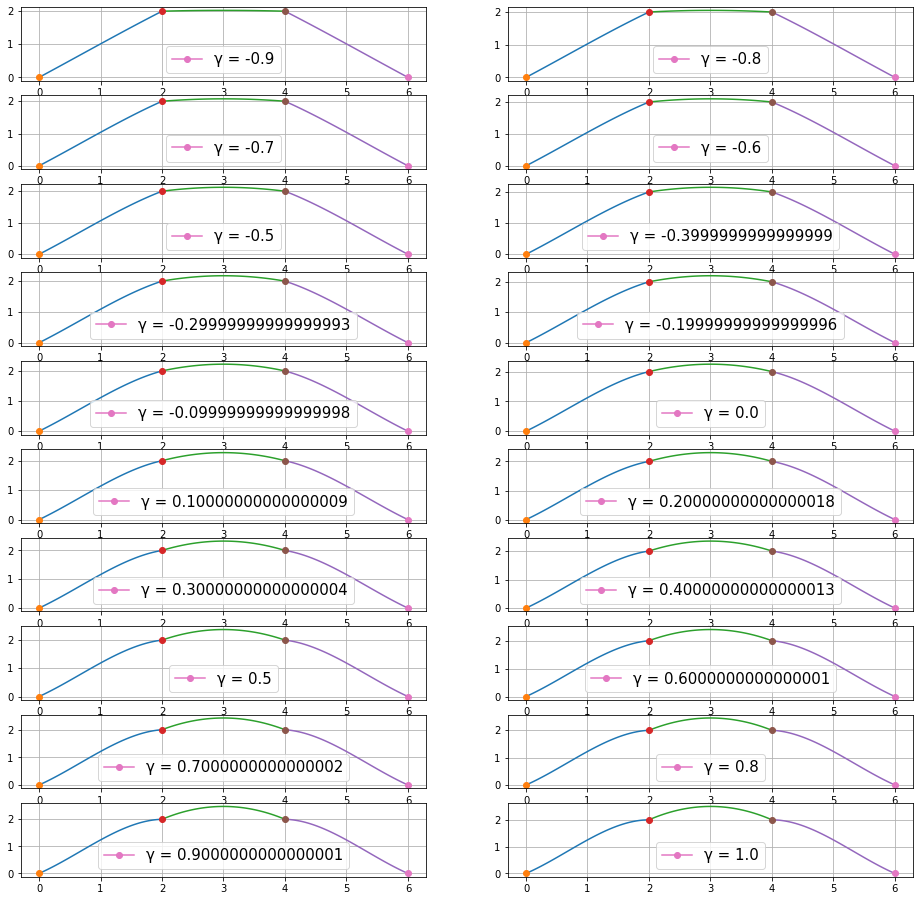

In [4]:
# write \theta and press TAB to get the greek letters.
def TCB_spline(θ, γ, β, points, T):
    
    if type(θ) in {float, int}:
        # const
        θ = [θ] * len(points)
        γ = [γ] * len(points)
        β = [β] * len(points)
    
    # u is the start vectors, v is the end vectors. 
    v = []
    u = []
    
    # At the start and finish v1 = u1, and vn = un
    v1 = (points[1] - points[0]) / (T[1] - T[0])
    vn = (points[-1] - points[-2]) / (T[-1] - T[-2])
    
    v.append(v1)
    u.append(v1)
    
    for i in range(1,  len(points) - 1):
        vi = (1 - θ[i]) * (1 + γ[i]) * (1 - β[i]) / 2 * (points[i+1] - points[i]) / (T[i+1] - T[i]) + \
            (1 - θ[i]) * (1 - γ[i]) * (1 + β[i]) / 2 * (points[i] - points[i-1]) / (T[i] - T[i-1])
        
        ui = (1 - θ[i]) * (1 - γ[i]) * (1 - β[i]) / 2 * (points[i+1] - points[i]) / (T[i+1] - T[i]) + \
            (1 - θ[i]) * (1 + γ[i]) * (1 + β[i]) / 2 * (points[i] - points[i-1]) / (T[i] - T[i-1])
        
        v.append(vi)
        u.append(ui)
    
    v.append(vn)
    u.append(vn)
    
    res = []
    tau = np.linspace(0, 1, 100) # as far as I understood, tau is just a set of elements from 0 to 1
    for i in range( len(points) - 1 ):
        res.append( H00(tau)*points[i][:, np.newaxis] + H10(tau)*(T[i+1] - T[i])*u[i][:, np.newaxis] + 
                   H01(tau)*points[i+1][:, np.newaxis] + H11(tau)*(T[i+1] - T[i])*v[i+1][:, np.newaxis] )
    return res, u, v


# Рисуем
points = np.array([ [0,0], [2, 2], [4, 2], [6, 0] ])
T = [0, 1, 2, 3]
fig = plt.figure(num=1, figsize=(16, 16))
rows = 10
columns = 2

for i in range(1, 21):
    splines, u, v = TCB_spline(0.0, -1.0 + i * 0.1 , 0.0, points, T)
    
    ax = fig.add_subplot(rows, columns, i)
    ax.grid()

    for sp in splines:
        X, Y = sp
        ax.plot(X, Y)
        ax.plot(X[0], Y[0], marker='o')

    ax.plot(X[-1], Y[-1], marker='o', label=f"γ = {-1.0 + i * 0.1}")
    ax.legend(fontsize=15)


    # ax.plot([2, 2 + u[1][0] * 2], [2, 2 + u[1][1] * 2])
    # ax.plot([2, 2 + v[1][0] * 2], [2, 2 + v[1][1] * 2])

# Задание 2
Напишите программу для построения кубического сплайна, проходящего через заданные точки.  
• Реализуйте хордовую интерполяцию. Постройте кубический сплайн для точек 𝑃0 = (0, 0), 𝑃1 =
(1, 1), 𝑃2 = (2, −1), 𝑃3 = (3, 0) и сверьте результаты расчетов с данными из таблицы 3.  
• Реализуйте нормализованную интерполяцию. Для тех же точек постройте нормализованный
сплайн и сверьте результаты с таблицей 4  
• Нарисуйте оба сплайна как показано на рисунке 20.

In [216]:
def hord_norm_interpolation(P, norm=False):
    """
    Хордовая интерполяция для кубического сплайна
    P: np.array of points
    
    return: set of estimated points
    """
    m1 = np.array([[]]) # matrix1 of the equation
    m2 = np.array([]) # matrix2 of the equation
    T = np.ones(len(P) - 1)
    
    # Fill the first and the last elements
    first_row = np.zeros(len(P))
    first_row[0] = 1
    last_row = np.zeros(len(P))
    last_row[-1] = 1
    
    point0 = P[1] - P[0]
    pointn = P[-1] - P[-2]
    
    m1 = np.append(m1, first_row)
    m2 = np.append(m2, point0)
    
    # Length of T has to be на единичку меньше, чем len(points)
    
    if norm == False:
        for i in range(1, len(P)):
            diff = P[i] - P[i-1]
            print("T is : ", T)
            T[i-1] = np.hypot(diff[0], diff[1])

#     print("1. m1 is: ", m1)
#     print("1. m2 is: ", m2)
    
    # Main cycle
    for i in range(1, len(P) - 1):        
        temp1 = np.zeros(len(P))
        temp1[i-1] = T[i]
        temp1[i] = 2*(T[i] + T[i-1])
        temp1[i+1] = T[i-1]
        m1 = np.vstack( (m1, temp1) )
        
#         print(f"{i} m1 is: ", m1)
        temp2 = np.array([ 3/(T[i-1]*T[i])*( T[i-1]**2*(P[i+1] - P[i]) + T[i]**2*(P[i] - P[i-1]))])
        m2 = np.vstack( (m2, temp2) )
#         print(f"{i} m2 is: ", m2)
    
    m1 = np.vstack( (m1, last_row) )
    m2 = np.vstack( (m2, pointn) ) 
    
#     print("M1 is: ", m1)
#     print("M2 is: ", m2)
    
    res = np.linalg.solve(m1, m2) # TODO: Check it, probably it's not right. 
    
    return res, T


def cubic_spline_from_hord(V, P, T):
    """
    Нахождение коэффициентов
    V: array of vectors
    P: array of points
    T: array of steps
    
    return: quibic coefficients of the estimated spline, x
    """
    res = np.array([[0, 0]])
    t = np.linspace(0, 1.5, 4000)
    x = np.array([np.ones(4000), t, t**2, t**3]).T
    #print("x is: ", x[:5])
    
    for i in range(1, len(V)): # from 1 to N-1 or from 0 to N ??? 
        a = np.array([ [1, 0, 0, 0], [0, 1, 0, 0], [ -3/T[i-1]**2, -2/T[i-1], 3/T[i-1]**2, -1/T[i-1] ],
            [ 2/T[i-1]**3, 1/T[i-1]**2, -2/T[i-1]**3, 1/T[i-1]**2 ] ])
        
        p = np.array([ P[i-1], V[i-1], P[i], V[i] ])
        
        # print("Multiplying... T is \n: ", T, "\n a is: \n", a, "\n p is: \n", p)
        mult = a @ p
        # print("Mult res is: ", mult)
        
        res = np.vstack((res, x @ mult))
    
    return res, t

In [217]:
points = np.array([[0, 0], [1, 1], [2, -1], [3, 0]])
V, T = hord_norm_interpolation(points)
# print("Approximated Vs: ", V)
spline, x = cubic_spline_from_hord(V, points, T)
# print("Spline is: ", spline)

V2, T2 = hord_norm_interpolation(points, norm=True)
spline2, x2 = cubic_spline_from_hord(V2, points, T)

T is :  [1. 1. 1.]
T is :  [1.41421356 1.         1.        ]
T is :  [1.41421356 2.23606798 1.        ]


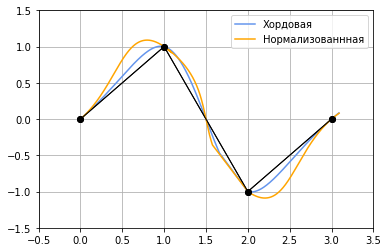

In [218]:
fig = plt.figure()
ax01 = fig.add_subplot(1, 1, 1)
ax01.grid()

ax01.plot(spline[1:, 0], spline[1:, 1], color="cornflowerblue", label="Хордовая")
ax01.plot(points[:, 0], points[:, 1], marker="o", lw=1, color="black")

ax01.plot(spline2[1:, 0], spline2[1:, 1], color="orange", label="Нормализованнная")
ax01.plot(points[:, 0], points[:, 1], marker="o", lw=1, color="black")

ax01.set_xlim(-0.5, 3.5)
ax01.set_ylim(-1.5, 1.5)

ax01.legend()

# Задание №3
Соединить следующие группы точек кубическим сплайном. Используйте сперва хордовую интерполяцию, а затем нормальную.

In [219]:
P1 = np.array([(13, 23.), (15, 23.), (16, 24.), (16, 26.), (15, 27.), (13, 27.), (12, 26.), (12, 24.), (13, 23.)])

P2 = np.array([( 9, 9.), (9, 15.), (11, 17.), (23, 17.), (25, 15.), (25, 9.)])
              
P3 = np.array([( 5, 22.), (4, 23.), (3, 23.), (1, 21.), (1, 20.), (2, 19.), (1, 18.), (1, 16.),
      (3, 15.), (4, 15.), (5, 16.)])
              
P4 = np.array([(29, 16.), (30, 15.), (31, 15.), (33, 17.), (33, 18.), (32, 19.), (33, 20.),
      (33, 22.), (31, 23.), (30, 23.), (29, 22.)])
              
P5 = np.array([(17, 24.), (19, 22.), (24, 22.), (26, 24.), (26, 29.), (24, 31.), (19, 31.), (17, 29.), (17, 24.)])
              
P6 = np.array([(11, 9.), (11, 7.), (9, 6.), (9, 5.), (11, 6.), (11, 4.), (12, 4.), 
      (12, 6), (14, 5.), (14, 6.), (12, 7.), (12, 9.)])
              
P7 = np.array([(17, 29.), (15, 31.), (10, 31.), (8, 29.), (8, 24.), (10, 22.), (15, 22.), (17, 24.)])
              
P8 = np.array([(19, 22.), (17, 18.), (15, 22.)])
              
P9 = np.array([(22, 9.), (22, 7.), (20, 6.), (20, 5.), (22, 6.), (22, 4.), (23, 4.), 
      (23, 6.), (25, 5.), (25, 6.), (23, 7.), (23, 9.)])
              
P10 = np.array([(19, 27.), (21, 27.), (22, 26.), (22, 24.), (21, 23.), (19, 23.), (18, 24.), (18, 26.), (19, 27.)])
P11 = np.array([(29, 10.), (29, 9.), (5, 9.), (5, 36.), (9, 33.), (25, 33.), (29, 36.), (29, 10.)])

points = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]

In [226]:
P1[3]

array([16., 26.])

In [235]:
fig1 = plt.figure(figsize=(15,20))

for i in range(len(points)):
    print("Sending the points...", points[i])
    V, T = hord_norm_interpolation(points[i])
    spline, x = cubic_spline_from_hord(V, points[i], T)
    
    ax = fig1.add_subplot(6, 2, i+1)
    ax.plot(spline[1:, 0], spline[1:, 1], color="cornflowerblue", label="Хордовая")
    P = points[i]
    ax.plot(P[:, 0], P[:, 1], marker="o", lw=1, color="black")

# V2, T2 = hord_norm_interpolation(points, norm=True)
# spline2, x2 = cubic_spline_from_hord(V2, points, T)

Sending the points... [[13. 23.]
 [15. 23.]
 [16. 24.]
 [16. 26.]
 [15. 27.]
 [13. 27.]
 [12. 26.]
 [12. 24.]
 [13. 23.]]
T is :  [1. 1. 1. 1. 1. 1. 1. 1.]
T is :  [2. 1. 1. 1. 1. 1. 1. 1.]
T is :  [2.         1.41421356 1.         1.         1.         1.
 1.         1.        ]
T is :  [2.         1.41421356 2.         1.         1.         1.
 1.         1.        ]
T is :  [2.         1.41421356 2.         1.41421356 1.         1.
 1.         1.        ]
T is :  [2.         1.41421356 2.         1.41421356 2.         1.
 1.         1.        ]
T is :  [2.         1.41421356 2.         1.41421356 2.         1.41421356
 1.         1.        ]
T is :  [2.         1.41421356 2.         1.41421356 2.         1.41421356
 2.         1.        ]
Sending the points... [[ 9.  9.]
 [ 9. 15.]
 [11. 17.]
 [23. 17.]
 [25. 15.]
 [25.  9.]]
T is :  [1. 1. 1. 1. 1.]
T is :  [6. 1. 1. 1. 1.]
T is :  [6.         2.82842712 1.         1.         1.        ]
T is :  [ 6.          2.82842712 12.        